In [ ]:
"""
Random Forest
Case_02

Grid Search
"""
#General Imports
import pandas as pd
import numpy as np
from math import log
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, CSVLogger
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score, cross_validate, RepeatedKFold
from keras.wrappers.scikit_learn import KerasRegressor
import time

'''
PreProcessing
''' 
#Loading Database
df_case_02 = pd.read_csv(r'Case_02_data.csv')

#Transforming to DataFrame
df_case_02 = pd.DataFrame(df_case_02)
df_case_02 = df_case_02.drop(columns='run')

#Transforming to NumpyArray
df_case_02 = df_case_02.to_numpy()

'''
Inputs
'''

X = df_case_02[:, [0, 1, 2]]

#1 --> Yeast Extract (g/L) --> index: 0
#2 --> Whey (g/L) --> index: 1
#3 --> Autoclave Temperature (ºC) --> index: 2
#4 --> Seawater (%) --> index: 3

'''
#Outputs
'''
y = df_case_02[:, [3]]

#1 --> Response: SUA (Mm urea hydrolyzed.min-1.OD-1) --> index: 4


#Scaling the and preparing the data
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()

#Scaling the Data
scaledX = scalerX.fit_transform(X)
scaledY = scalerY.fit_transform(y)


#Train & Test split
X_train, X_test, y_train, y_test = train_test_split(scaledX, scaledY, 
                                                   test_size = 0.15)

In [ ]:
#CrossVal
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

#Random forest Model
model = RandomForestRegressor(bootstrap = 'True', n_estimators = 10, max_depth = 40,
                              min_samples_split = 2, min_samples_leaf = 1)

In [ ]:
#Repeated k-Fold
cv = RepeatedKFold(n_splits = 10, n_repeats = 10)

#Initial time
start_time = time.time()

# Cross_Val_Score
scores = cross_val_score(model, X, y.ravel(), cv = cv, scoring = 'neg_mean_squared_error', n_jobs = 1)

#Final time
end_time = (time.time() - start_time)
print('The running time is: %.2f minutes' %(end_time/60))

The running time is: 0.02 minutes


In [ ]:
#mse
mse = abs(scores.mean())
mse

0.00028250107791546986

Annotate:

Single Layer kfold = 10 n_repeat = 10 // activation = relu-linear

n_estimator (10):
----------------
mse: 0.0028

time: 0.02  minutes

n_estimator (25):
----------------
mse: 0.00029

time:  0.05 mminutes

n_estimator (50):
----------------
mse: 0.00028

time: 0.11 minutes

n_estimator (100):
----------------
mse: 0.00028

time: 0.20 minutes

n_estimator (200):
----------------
mse: 0.0027

time:  0.40 minutes

n_estimator (300):
----------------
mse: 0.0027

time:  0.60 minutes

## PLOTTING

In [ ]:
#General Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

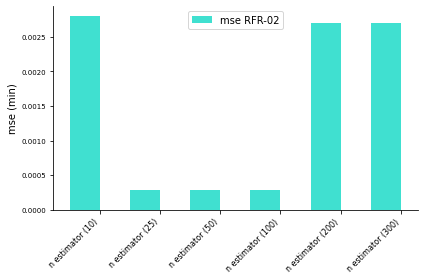

In [ ]:
#RF-02-mse
df_metrics_mae_fs = pd.DataFrame({'n estimator':['n estimator (10)', 'n estimator (25)', 'n estimator (50)', 'n estimator (100)',
                              'n estimator (200)', 'n estimator (300)'], 'RF-02 mse': [.0028, .00029, .00028, .00028, .0027, .0027]})

labels = ['n estimator (10)', 'n estimator (25)', 'n estimator (50)', 'n estimator (100)', 'n estimator (200)', 'n estimator (300)']
mse_RF_02 = [.0028, .00029, .00028, .00028, .0027, .0027]

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mse_RF_02, width, label = 'mse RFR-02', color = 'turquoise')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('mse (min)')
#ax.set_xlabel('Model')
#ax.set_title('Mae (kPa) by Random Forest and DNN - fs')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis = 'both', which='major', labelsize=7)
ax.legend()
ax.tick_params(axis='x', colors = 'black')
ax.tick_params(axis='y', colors = 'black')
ax.set_xticklabels(labels, rotation = (45), fontsize = 8, va='top', ha='right')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('black')
ax.grid(False)
fig.tight_layout()
plt.savefig('RFR-02-mse', dpi = 600)
plt.show()

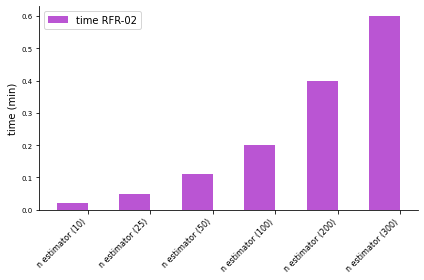

In [ ]:
#RF-02-timeprocessing
df_metrics_mae_fs = pd.DataFrame({'n estimator':['n estimator (10)', 'n estimator (25)', 'n estimator (50)', 'n estimator (100)',
                              'n estimator (200)', 'n estimator (300)'], 'RF-02 mse': [.02, .05, .11, .2, .4, .6]})

labels = ['n estimator (10)', 'n estimator (25)', 'n estimator (50)', 'n estimator (100)', 'n estimator (200)', 'n estimator (300)']
time_RF_02 = [.02, .05, .11, .2, .4, .6]

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, time_RF_02, width, label = 'time RFR-02', color = 'mediumorchid')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('time (min)')
#ax.set_xlabel('Model')
#ax.set_title('Mae (kPa) by Random Forest and DNN - fs')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.tick_params(axis = 'both', which='major', labelsize=7)
ax.legend()
ax.tick_params(axis='x', colors = 'black')
ax.tick_params(axis='y', colors = 'black')
ax.set_xticklabels(labels, rotation = (45), fontsize = 8, va='top', ha='right')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('black')
ax.grid(False)
fig.tight_layout()
plt.savefig('RFR-02-time', dpi = 600)
plt.show()

In [ ]:
#qc (MPa) correlation matrix
k = 10 #number of variables for heatmap
cols = df_cpt.corr().nlargest(k, 'qc (MPa)')['qc (MPa)'].index
cm = df_cpt[cols].corr()
plt.figure(figsize=(16,14))
#plt.title('Correlation of Variables')
sns.heatmap(cm, annot = True, cmap = 'viridis')
plt.savefig('Correlation_of_Variables', dpi = 300)

Corrplot

In [ ]:
#Loading Database
df_case_02 = pd.read_csv(r'Case_02_data.csv')
df_case_02 = df_case_02.drop(columns='run')
df_case_02 = df_case_02.rename(columns= {'Response: CaCO3 precipitation rate (h-1)': 'CaCO3'})
df_case_02

,Urea (g/L),Calcium chloride (g/L),Nickel (II) nitrate (g/L),CaCO3
0,7.00,7.00,0.0076,0.002000
1,25.00,7.00,0.0076,0.026000
2,7.00,25.00,0.0076,0.000070
3,25.00,25.00,0.0076,0.017000
4,7.00,7.00,0.0291,0.004000
5,25.00,7.00,0.0291,0.035000
6,7.00,25.00,0.0291,0.000060
7,25.00,25.00,0.0291,0.019000
8,0.86,16.00,0.0183,0.000145
9,31.14,16.00,0.0183,0.097000


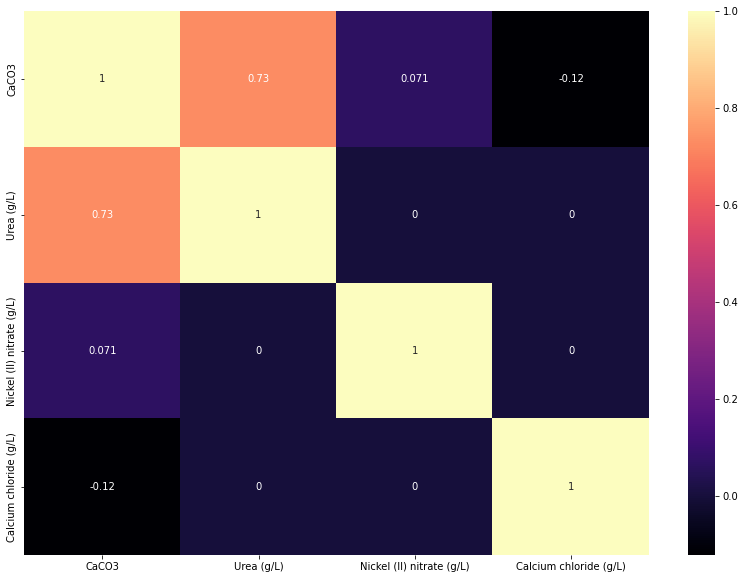

In [ ]:
k = 10 #number of variables for heatmap
cols = df_case_02.corr().nlargest(k, 'CaCO3')['CaCO3'].index
cm = df_case_02[cols].corr()
plt.figure(figsize=(14,10))
#plt.title('Correlation of Variables')
sns.heatmap(cm, annot = True, cmap = 'magma')
plt.savefig('Case-02-Correlation', dpi = 300)